<a href="https://colab.research.google.com/github/subhashreegre/Data-Analysis-Future-Prediction-of-COVID-Infected-Countries/blob/main/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
# loading all the three datasets of confirmed,death and recovered cases

confirmed_cases= pd.read_csv("/content/time_series_19-covid-Confirmed.csv")

In [ ]:
death_cases= pd.read_csv("/content/time_series_19-covid-Deaths.csv")

In [ ]:
recovered_cases= pd.read_csv("/content/time_series_19-covid-Recovered.csv")

In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183


In [ ]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29,29,29,33,35
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,4


In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,28,31,31,31,31,31,31,31,31,33,34,34,35,35,35,35,41,42,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,18,22,22,22,22,22,22,22,22,32,32,32,43,43,43,46,76,76,76,101,118,118,118,118,118,144,144,144,150,191,232
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114,114,114,124,140
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49,60,75,87,114


In [ ]:
# Extracting all the columns using the .keys() function

cols= confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20'],
      dtype='object')

In [ ]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = death_cases.loc[:, cols[4]:cols[-1]]
recovered = recovered_cases.loc[:, cols[4]:cols[-1]]


In [ ]:
# Check the head of the outbreak cases

confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411
1,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007
2,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432
3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183


In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
china_cases = []
italy_cases = []
us_cases = []
india_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()

    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())

In [ ]:
# Total active cases

total_active

[510,
 605,
 879,
 1353,
 2010,
 2784,
 5340,
 5907,
 7920,
 9492,
 11495,
 15953,
 18832,
 22548,
 25947,
 28696,
 31661,
 33698,
 36000,
 37803,
 39006,
 38953,
 52702,
 57304,
 57969,
 58589,
 58807,
 58777,
 57396,
 55773,
 55682,
 53235,
 53102,
 51712,
 49800,
 48241,
 46663,
 44537,
 43288,
 42657,
 41619,
 41452,
 40696,
 40738,
 42459,
 43905,
 45299,
 47079,
 49926,
 54247,
 55299,
 69538,
 77651,
 84972,
 96313,
 108397,
 122970,
 147987,
 173611,
 200052]

In [ ]:
# Let's display each of the newly created variables

confirmed_sum

304524

In [ ]:
death_sum

12973

In [ ]:
recovered_sum

91499

In [ ]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708,
 272166,
 304524]

In [ ]:
# Convert all the dates and the cases in the form of a numpy array

days_since_start = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [ ]:
days_since_start

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]])

In [ ]:
world_cases.size

60

In [ ]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973]])

In [ ]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034],
       [78088],
       [80840],
       [83207],
       [84854],
       [87256],
       [91499]])

In [ ]:
# future forecasting for the next 20 days

days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates_10= future_forecast[:-10]
adjusted_dates_20= future_forecast[:-20]


In [ ]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [ ]:
# Convert all the integers into datetime for btter visualisation

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
# For visualization of latest date

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = death_cases[dates[-1]]
latest_recovered = recovered_cases[dates[-1]]

In [ ]:
latest_confirmed

0       411
1      1007
2       432
3         1
4      1183
       ... 
477       1
478       1
479       1
480       1
481       1
Name: 3/21/20, Length: 482, dtype: int64

In [ ]:
latest_deaths

0       1
1      35
2       2
3       0
4       4
       ..
477     0
478     0
479     0
480     0
481     0
Name: 3/21/20, Length: 482, dtype: int64

In [ ]:
latest_recovered

0       42
1      232
2      140
3        1
4      114
      ... 
477      0
478      0
479      0
480      0
481      0
Name: 3/21/20, Length: 482, dtype: int64

In [ ]:
# Finds the list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [ ]:
# Total no.of confirmed cases in each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [ ]:
# No. of cases per country/region

print('Confirmed cases by Countries/Regions : ')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by Countries/Regions : 
China: 81305 cases
Italy: 53578 cases
US: 25489 cases
Spain: 25374 cases
Germany: 22213 cases
Iran: 20610 cases
France: 14431 cases
Korea, South: 8799 cases
Switzerland: 6575 cases
United Kingdom: 5067 cases
Netherlands: 3640 cases
Belgium: 2815 cases
Austria: 2814 cases
Norway: 2118 cases
Sweden: 1763 cases
Denmark: 1420 cases
Portugal: 1280 cases
Canada: 1278 cases
Malaysia: 1183 cases
Australia: 1071 cases
Brazil: 1021 cases
Japan: 1007 cases
Czechia: 995 cases
Israel: 883 cases
Ireland: 785 cases
Pakistan: 730 cases
Cruise Ship: 712 cases
Luxembourg: 670 cases
Turkey: 670 cases
Chile: 537 cases
Poland: 536 cases
Greece: 530 cases
Finland: 523 cases
Ecuador: 506 cases
Qatar: 481 cases
Iceland: 473 cases
Indonesia: 450 cases
Singapore: 432 cases
Thailand: 411 cases
Saudi Arabia: 392 cases
Slovenia: 383 cases
Romania: 367 cases
India: 330 cases
Peru: 318 cases
Philippines: 307 cases
Estonia: 306 cases
Russia: 306 cases
Bahrain: 305 cases
Egypt: 

In [ ]:
# Find the list of unique states/provinces

unique_provinces = list(confirmed_cases['Province/State'].unique())

# these are countries which are not provinces/states

outliers = ['United Kingdom','Denmark','France']
for i in outliers:
  unique_provinces.remove(i)

In [ ]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
  cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
  if cases > 0 :
    province_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_provinces.remove(i)


In [ ]:
# Number of cases per province/city/state

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 424 cases
New South Wales: 436 cases
Victoria: 229 cases
Queensland: 221 cases
South Australia: 67 cases
Western Australia: 90 cases
Tasmania: 16 cases
Northern Territory: 3 cases
Ontario: 377 cases
Alberta: 195 cases
Quebec: 181 cases
Washington: 1793 cases
New York: 11710 cases
California: 1364 cases
Massachusetts: 525 cases
Diamond Princess: 761 cases
Grand Princess: 33 cases
Georgia: 507 cases
Colorado: 390 cases
Florida: 659 cases
New Jersey: 1327 cases
Oregon: 114 cases
Texas: 581 cases
Illinois: 753 cases
Pennsylvania: 396 cases
Iowa: 68 cases
Maryland: 193 cases
North Carolina: 253 cases
South Carolina: 171 cases
Tennessee: 371 cases
Virginia: 156 cases
Arizona: 118 cases
Indiana: 128 cases
Kentucky: 87 cases
District of Columbia: 77 cases
Nevada: 161 cases
New Hampshire: 55 cases
Minnesota: 138 cases
Nebraska: 38 cases
Ohio: 248 cases
Rhode Island: 66 cases
Wisconsin: 282 cases
Connecticut: 194 cases
Hawaii: 37 cases
Oklahoma: 53 cases
Utah: 136 cases
Kansas:

In [ ]:
# Handling Nan values if any

nan_indices = []

for i in range(len(unique_provinces)):
  if type(unique_provinces[i]) == float:
    nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_cases.pop(i)

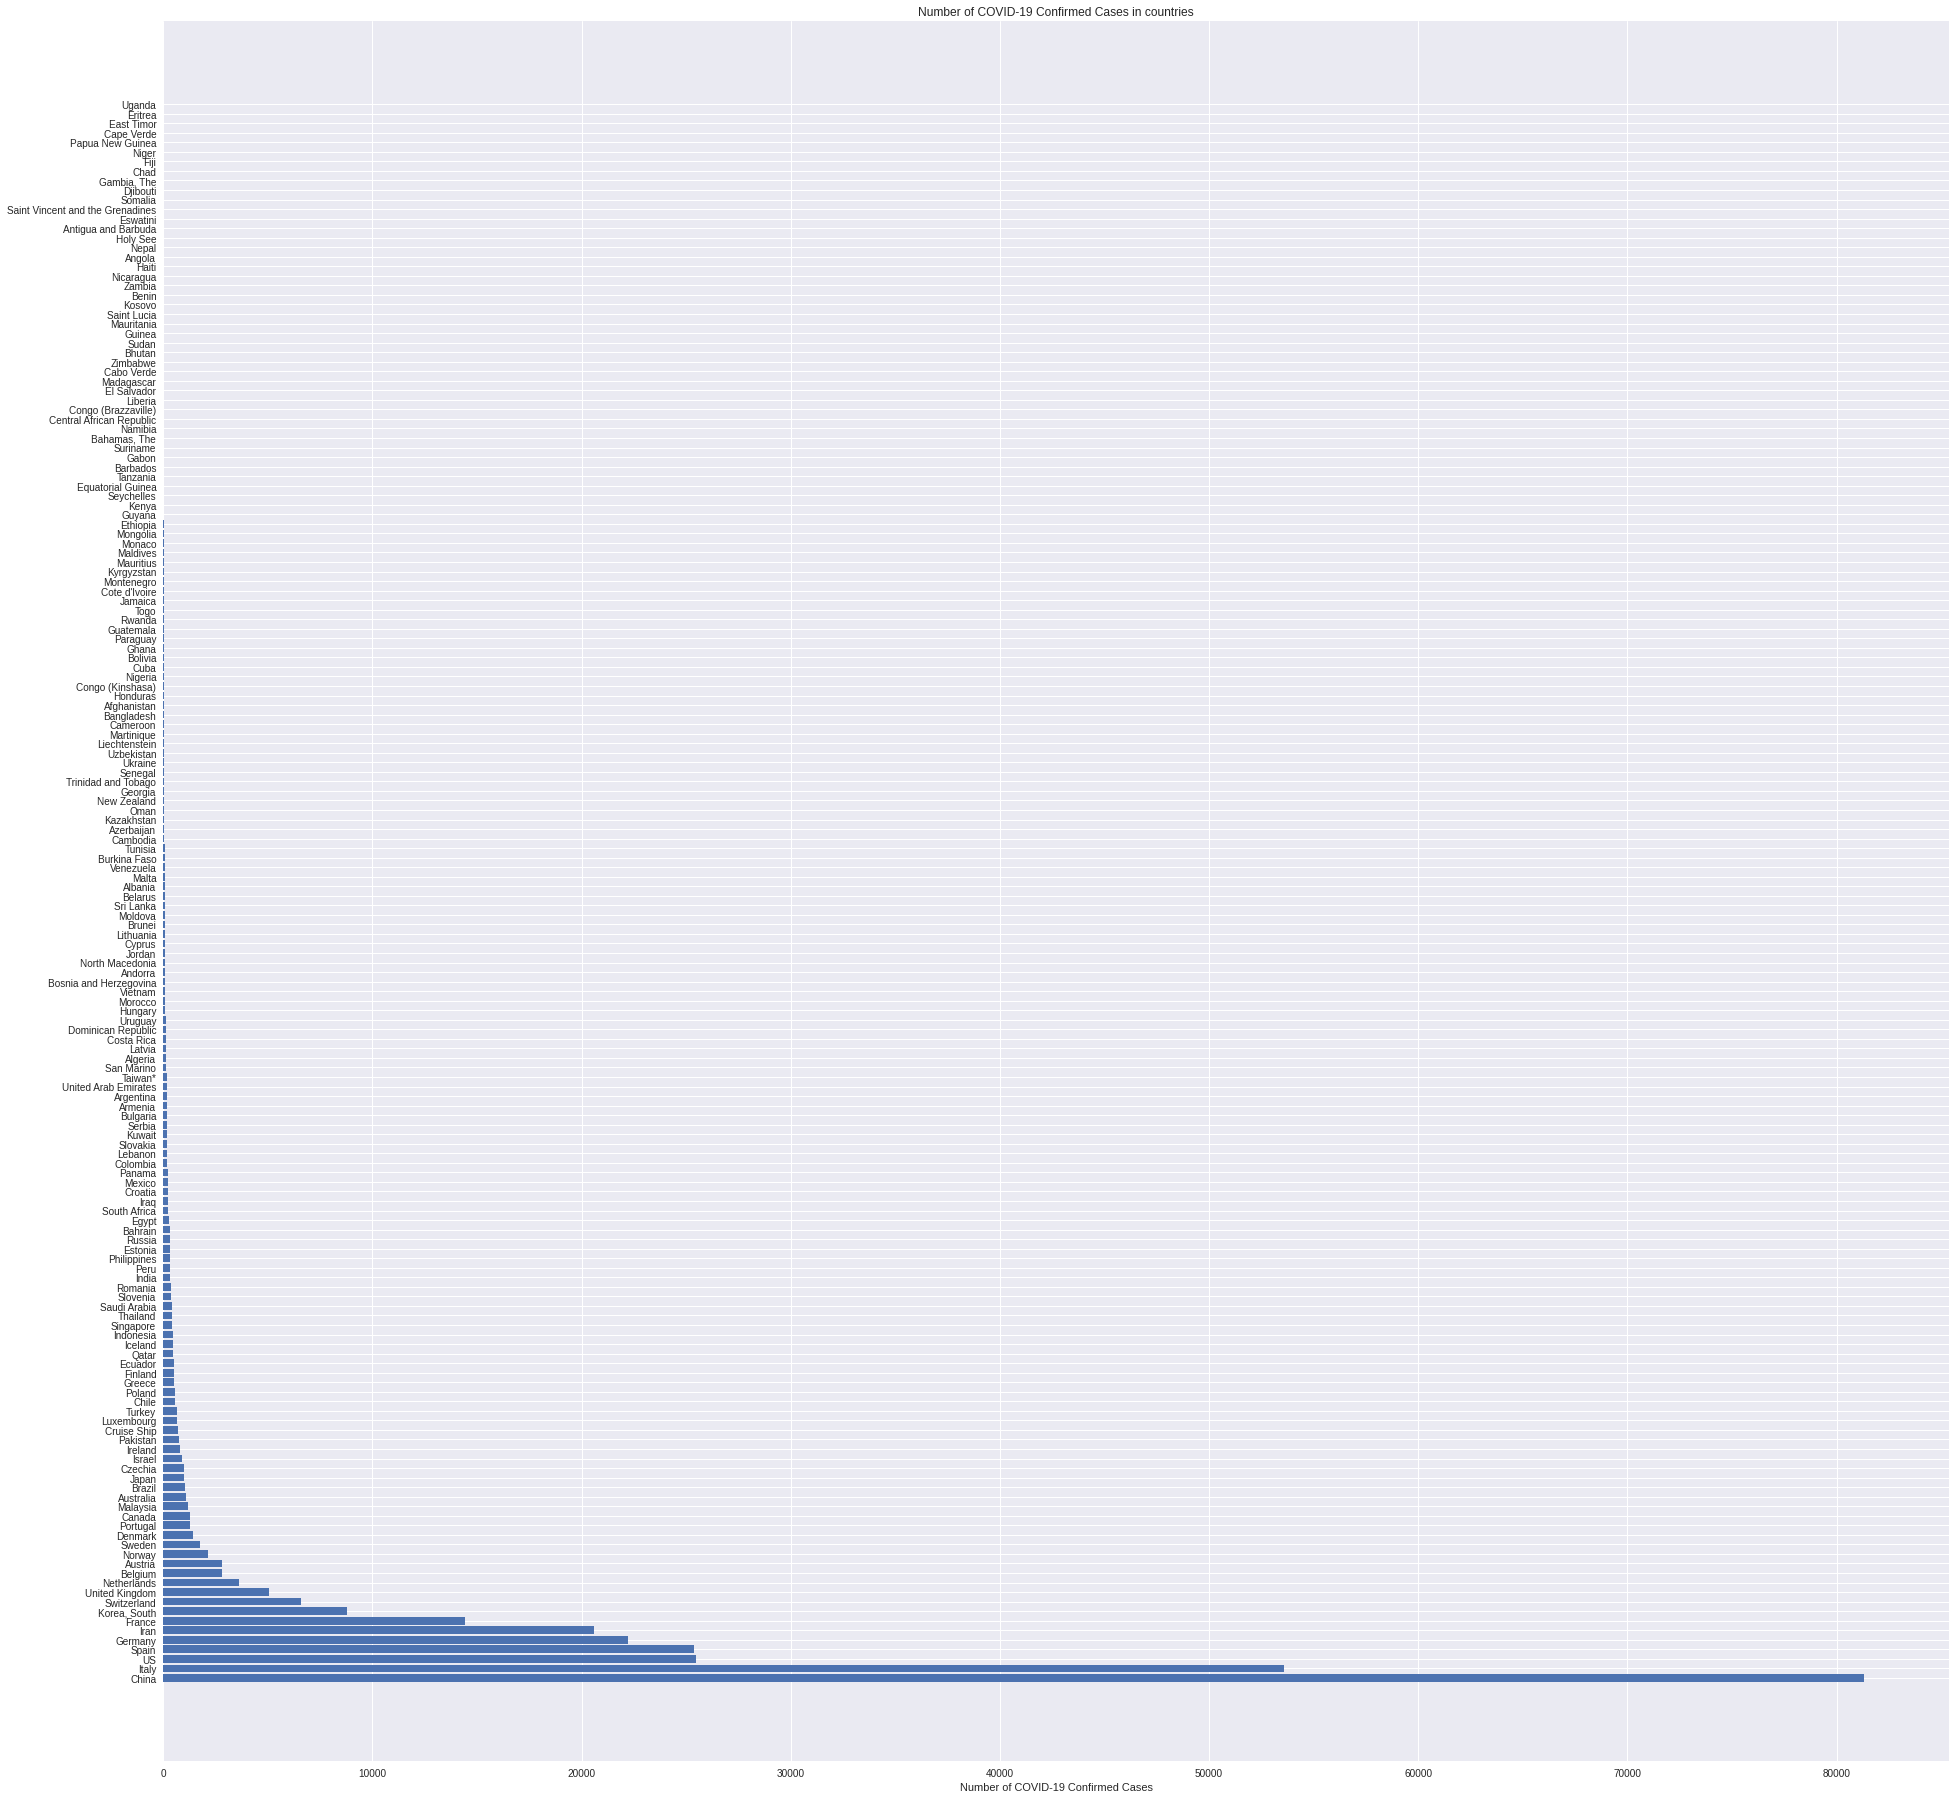

In [ ]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of COVID-19 Confirmed Cases in countries')
plt.xlabel('Number of COVID-19 Confirmed Cases')
plt.show()

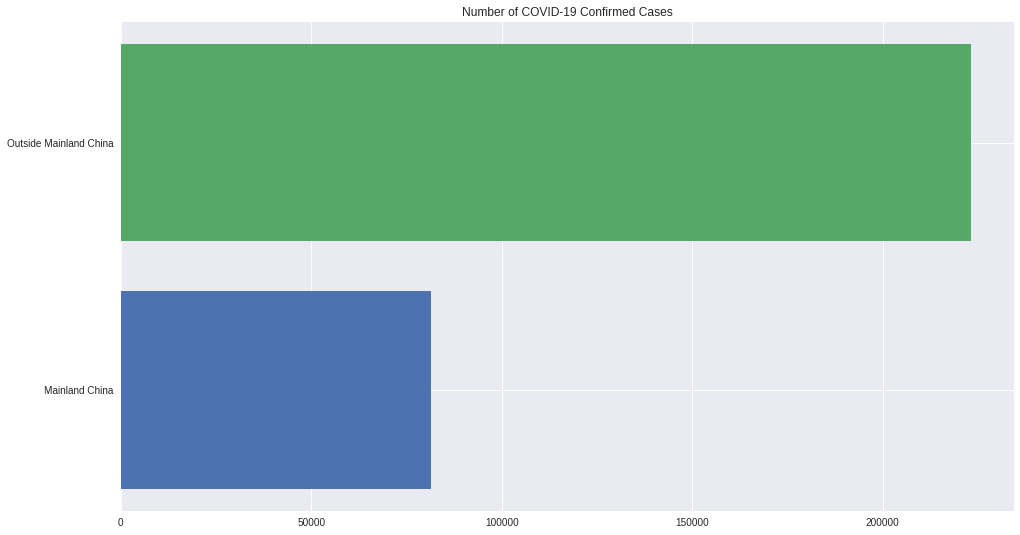

In [ ]:
# Plot a bar graph to see the total confirmed cases between mainland china & outside mainland china

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']== 'China'].sum()
outside_mainland_china = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China',china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china)
plt.title('Number of COVID-19 Confirmed Cases')
plt.show()

In [ ]:
# print the total cases in mainland china and outside of it

print('Outside Mainland China {} cases:'.format(outside_mainland_china))
print('Mainland China {} cases:'.format(china_confirmed))
print('Total: {} cases'.format(outside_mainland_china+china_confirmed))

Outside Mainland China 223219 cases:
Mainland China 81305 cases:
Total: 304524 cases


In [ ]:
# Only show 10 countries with the most confirmed cases,India and  the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
India_confirmed = latest_confirmed[confirmed_cases['Country/Region']== 'India'].sum()
others = np.sum(country_confirmed_cases[10:]) - India_confirmed
for i in range(len(country_confirmed_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

visual_unique_countries.append('India')
visual_confirmed_cases.append(India_confirmed)


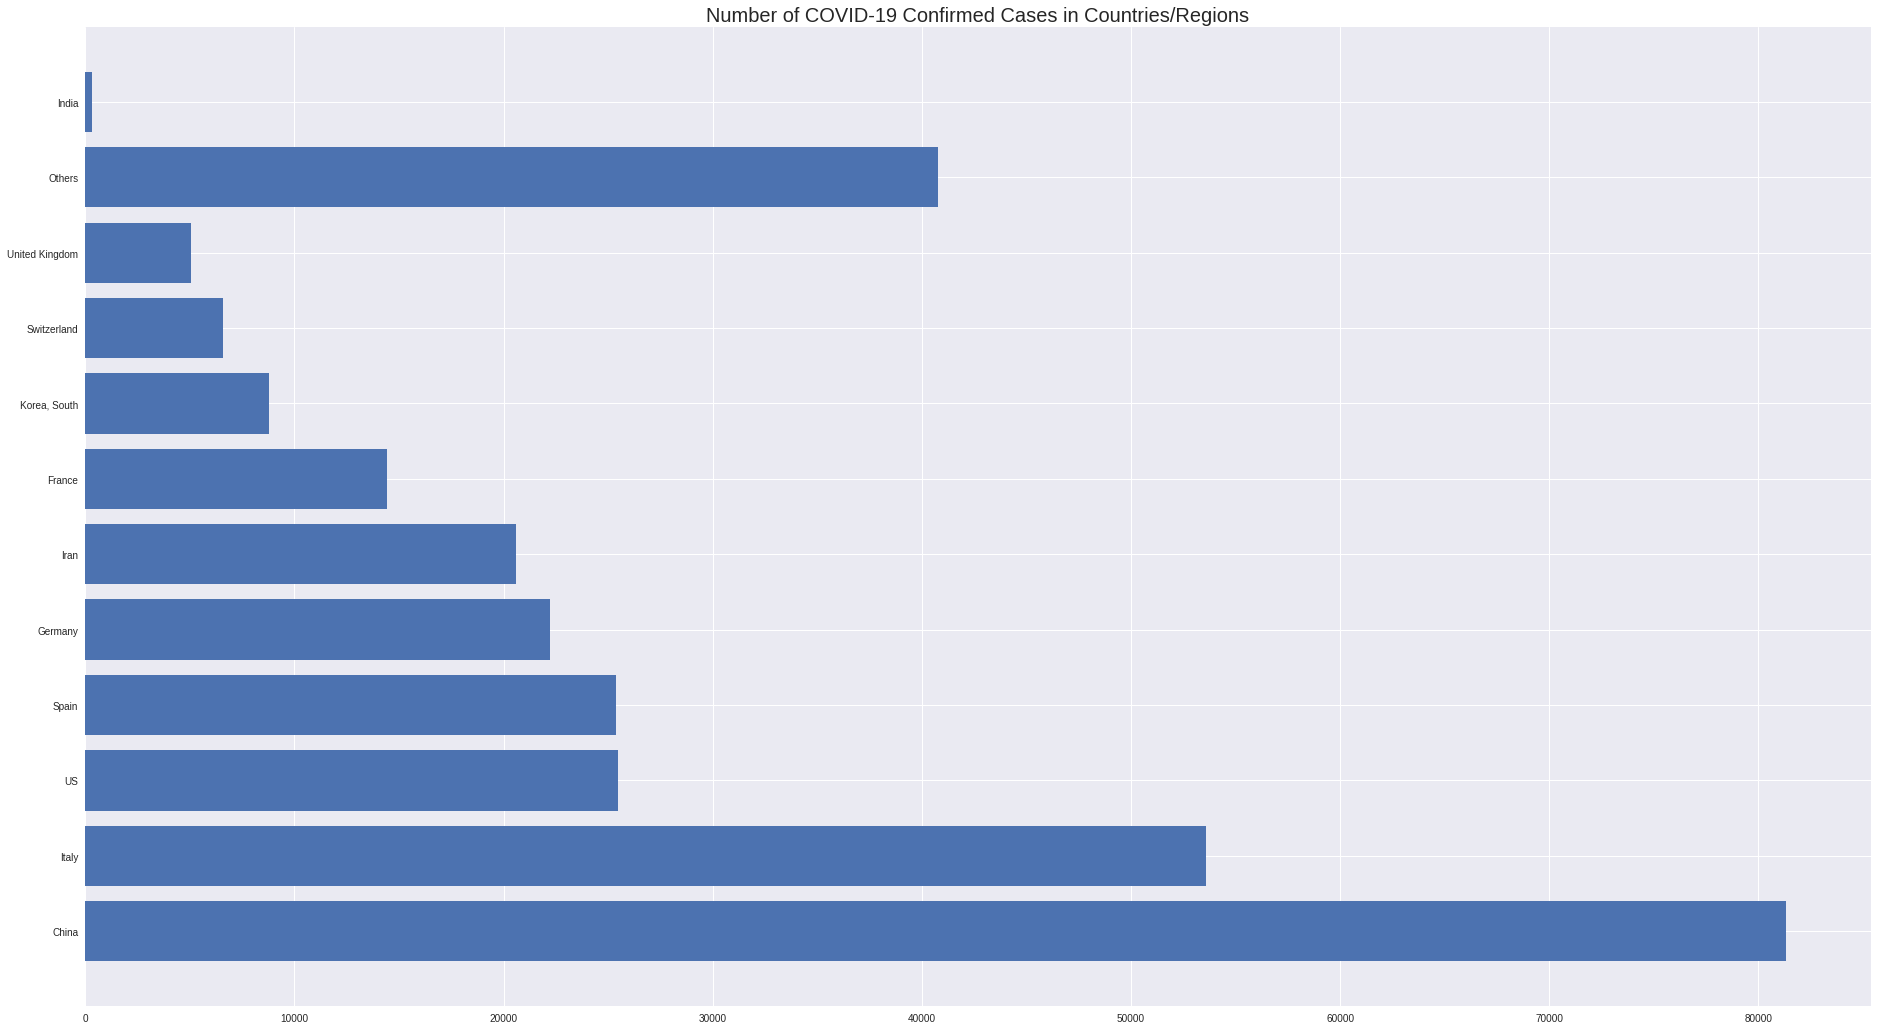

In [ ]:
# Visualization

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of COVID-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

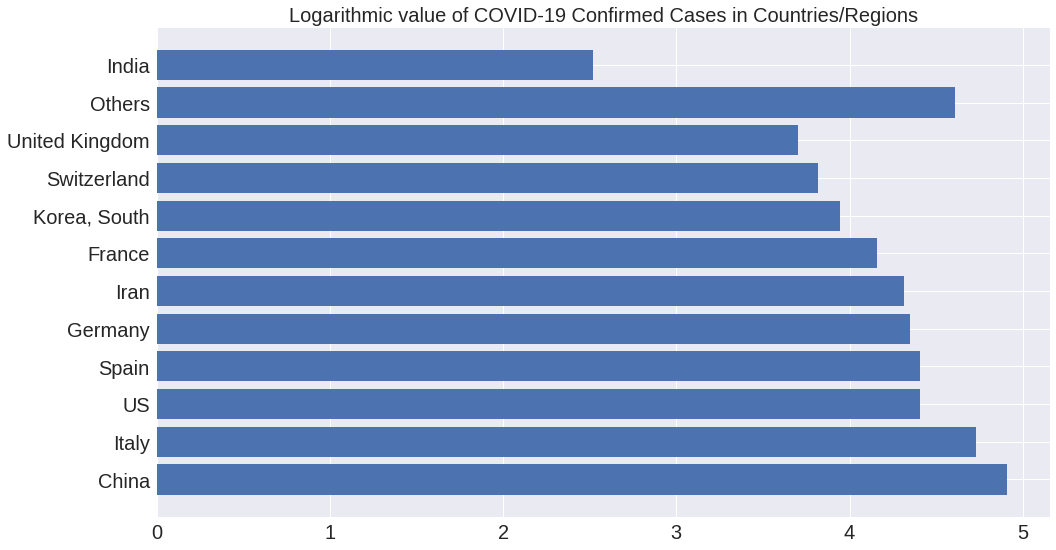

In [ ]:
# lets look at it in a logarithmic scale

log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, log_country_confirmed_cases)
plt.title('Logarithmic value of COVID-19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

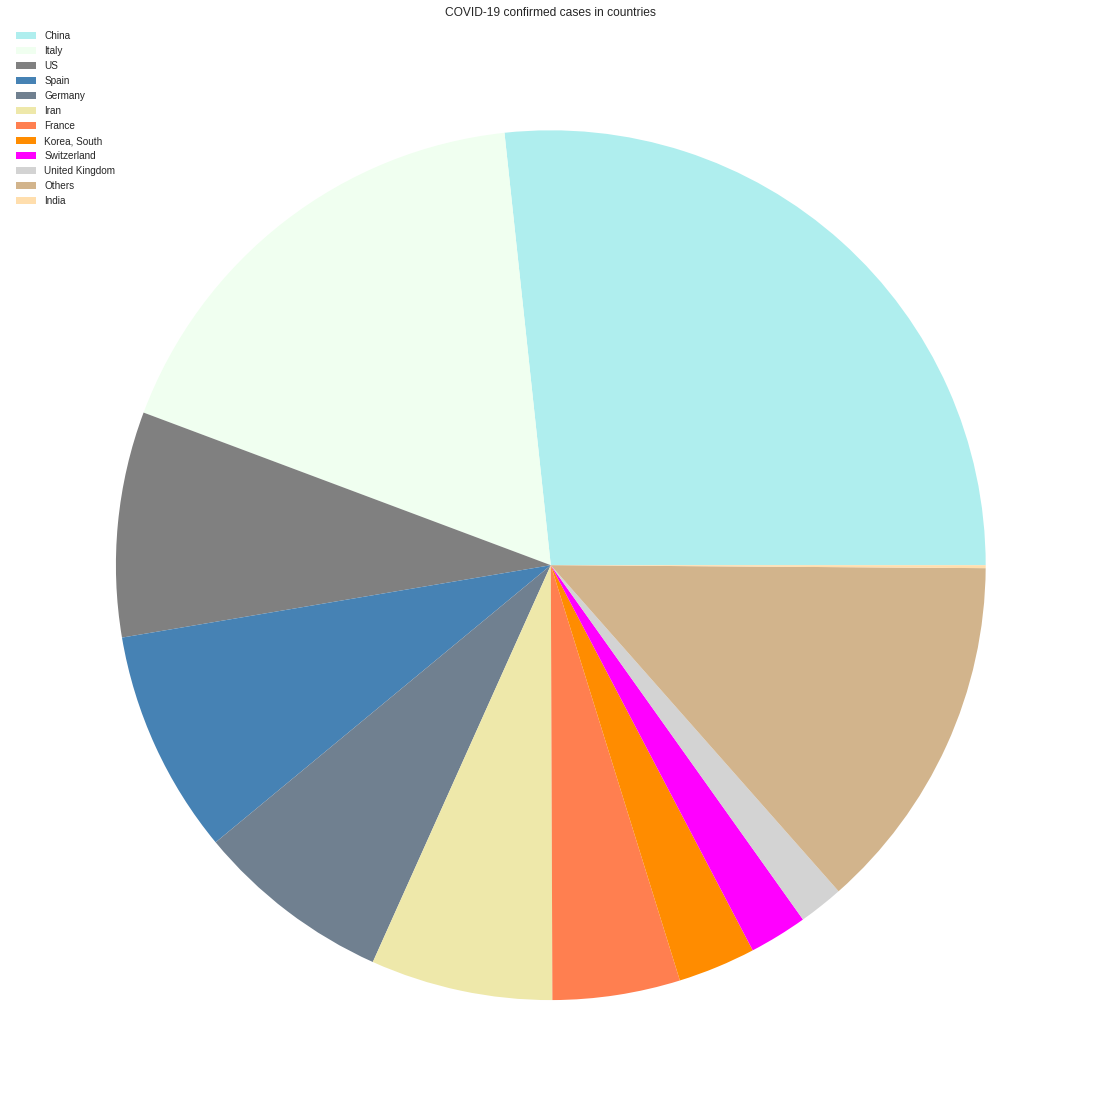

In [ ]:
# Create a pie chart to see the total confirmed cases

c= random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title("COVID-19 confirmed cases in countries")
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()



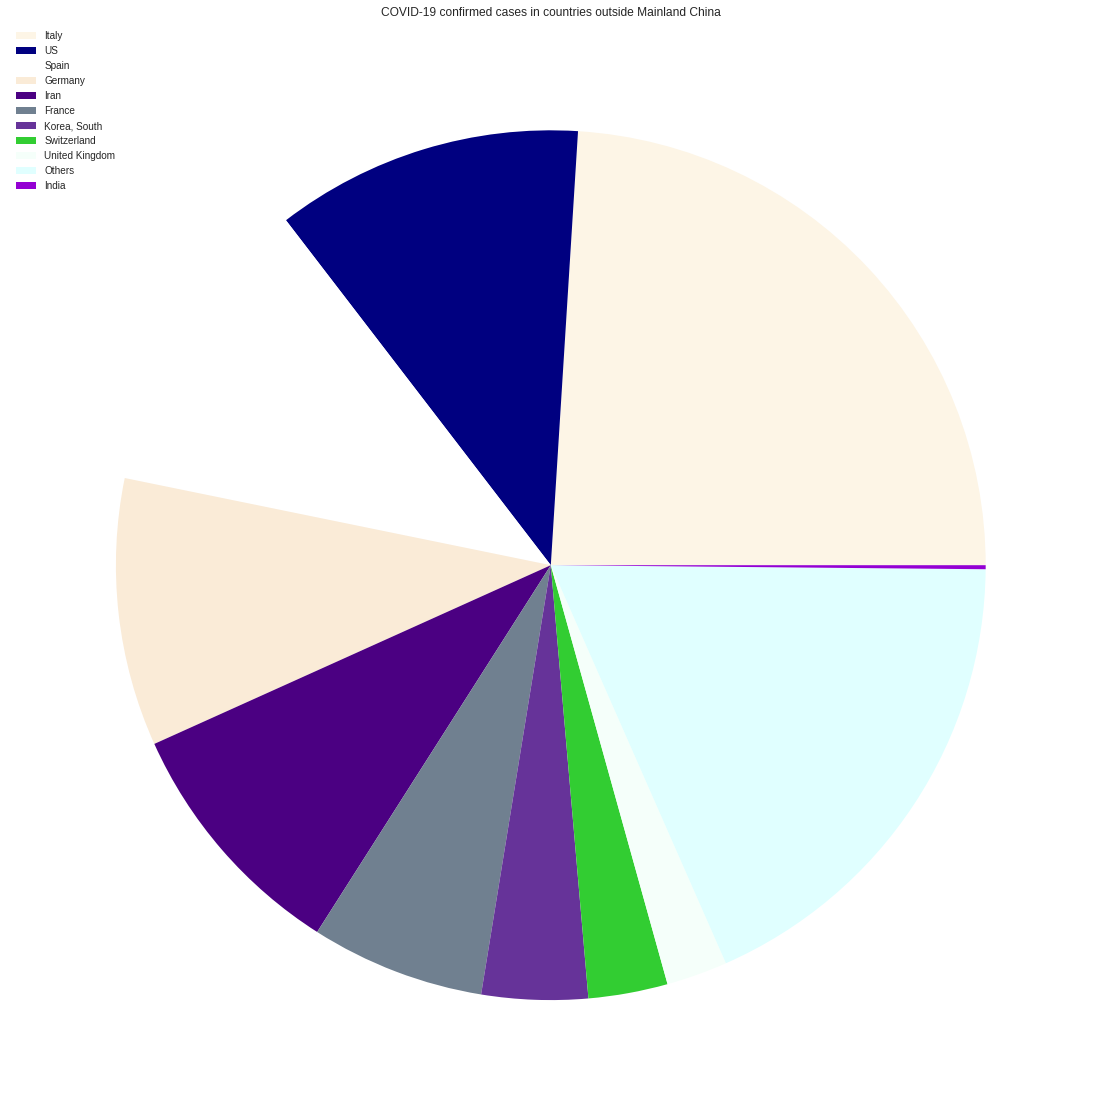

In [ ]:
# Create a pie chart to see the total confirmed cases in different countries except China

c= random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title("COVID-19 confirmed cases in countries outside Mainland China")
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()


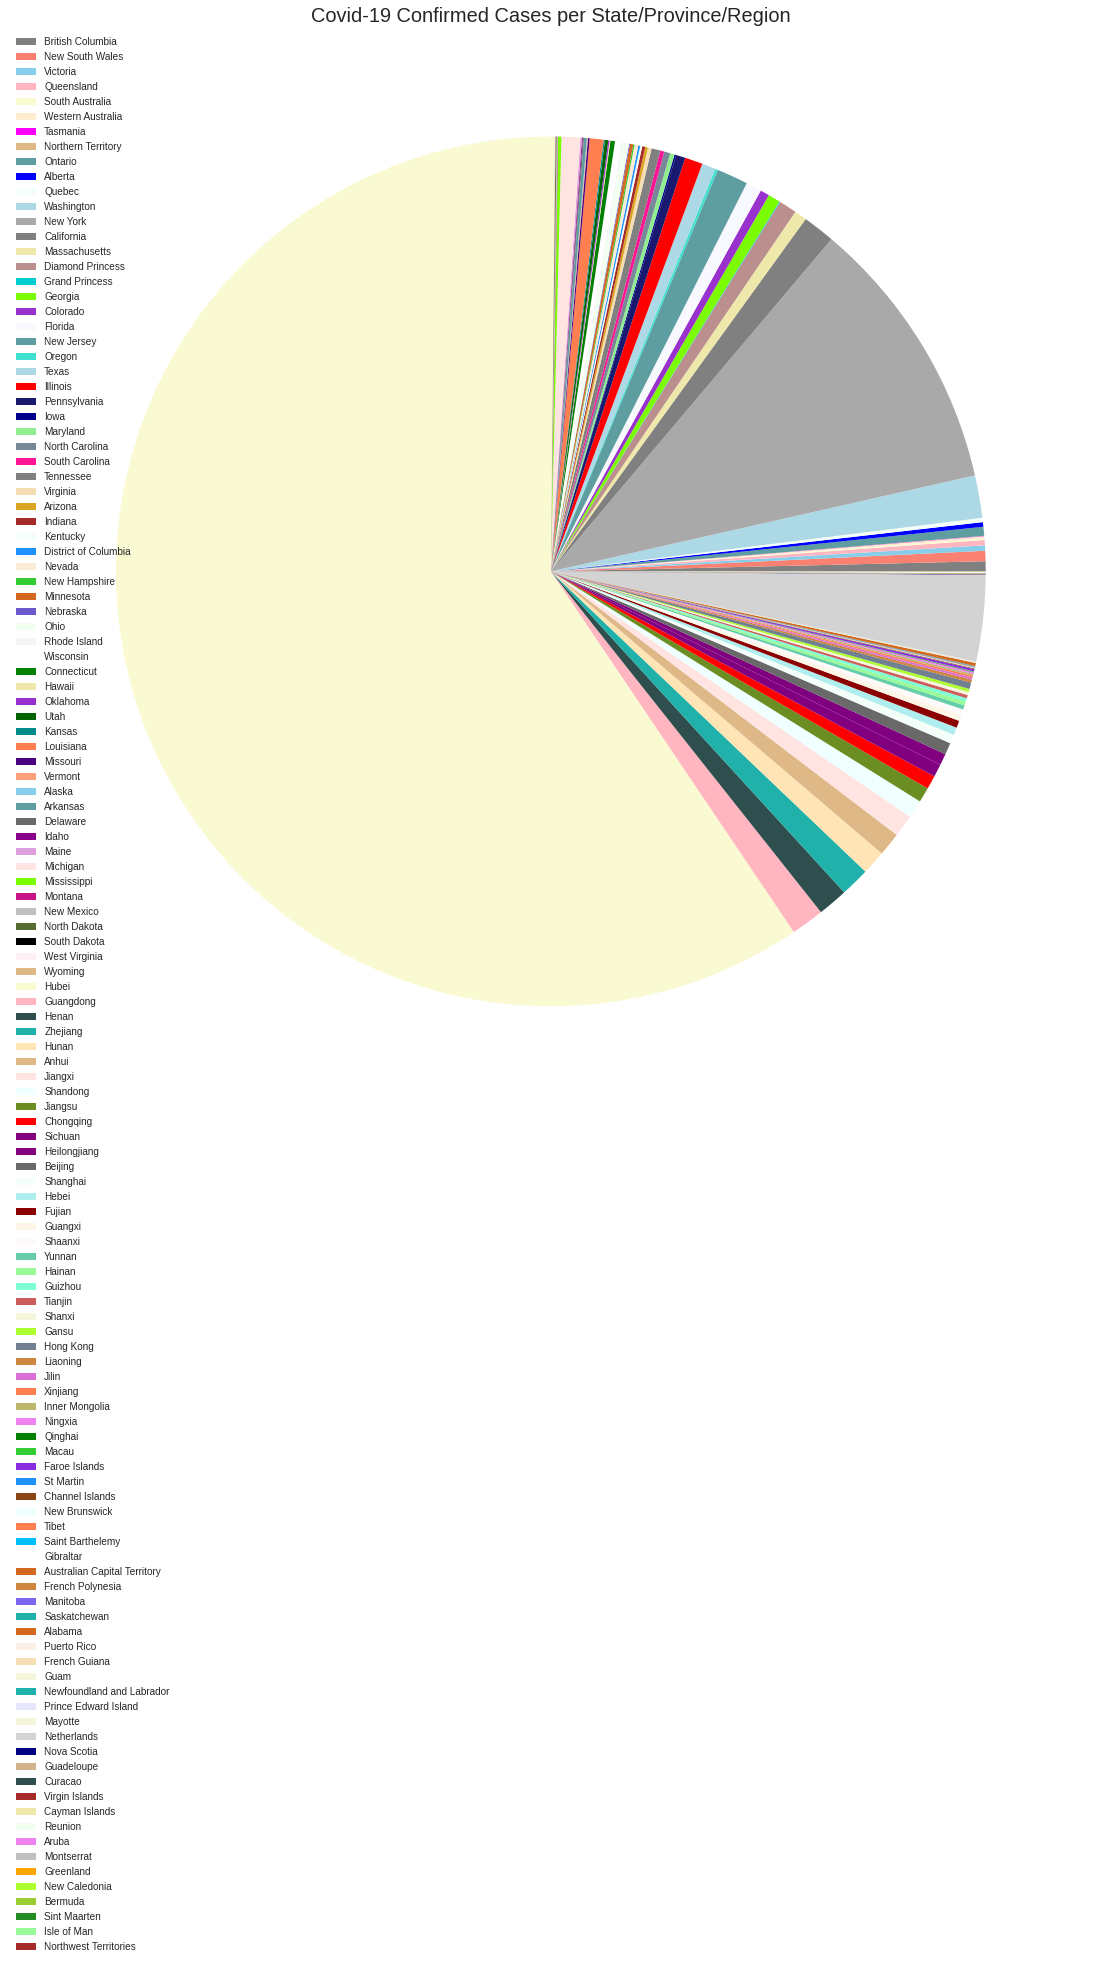

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_provinces))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per State/Province/Region', size=20)
plt.pie(province_confirmed_cases, colors=c)
plt.legend(unique_provinces, loc='best')
plt.show()


In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_start, world_cases, test_size=0.15, shuffle=False)

In [ ]:
# Model for predicting of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression.

c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
degree = [3, 4, 5]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'degree': [3, 4, 5],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
svm_search.best_params_

{'C': 1, 'degree': 4, 'epsilon': 0.1, 'gamma': 0.01, 'shrinking': True}

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 13921.582983100301
MSE: 217525929.31356633


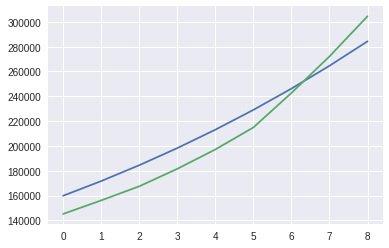

In [ ]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [ ]:
# import Polynomial_Features
from sklearn.preprocessing import PolynomialFeatures

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forecast)

In [ ]:
# import Linear_Regression & Bayesian_Ridge
from sklearn.linear_model import LinearRegression, BayesianRidge

# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 8320.26730602395
MSE: 132433998.10749973


In [ ]:
print(linear_model.coef_)

[[ 2.89415062e+03 -1.95738979e+03  3.95730519e+02 -9.70619730e+00
   1.19969724e-02  1.20550876e-03]]


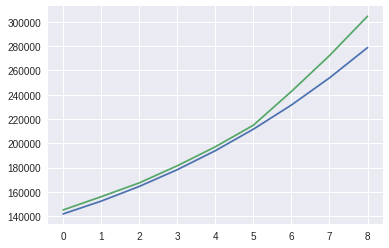

In [ ]:
# plotting Regression graph

plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

In [ ]:
# bayesian ridge

tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [ ]:
bayesian_search.best_params_

{'alpha_1': 1e-07,
 'alpha_2': 1e-07,
 'lambda_1': 0.0001,
 'lambda_2': 1e-07,
 'tol': 0.01}

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 77254.8113261316
MSE: 8025770913.181883


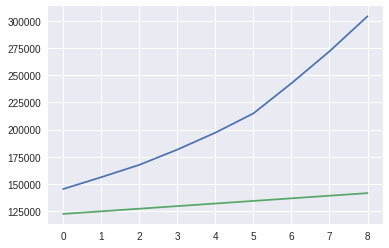

In [ ]:
# Plotting Bayesian Ridge graph

plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

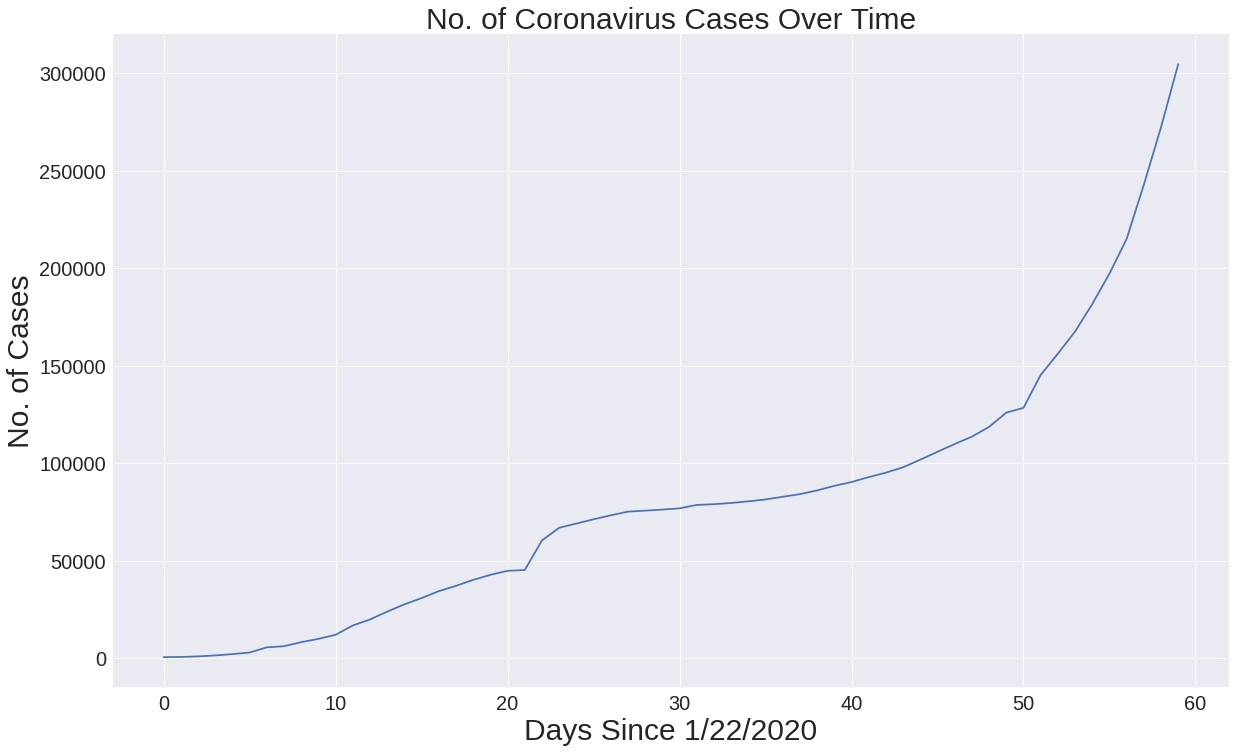

In [ ]:
# Plotting the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, world_cases)
plt.title('No. of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

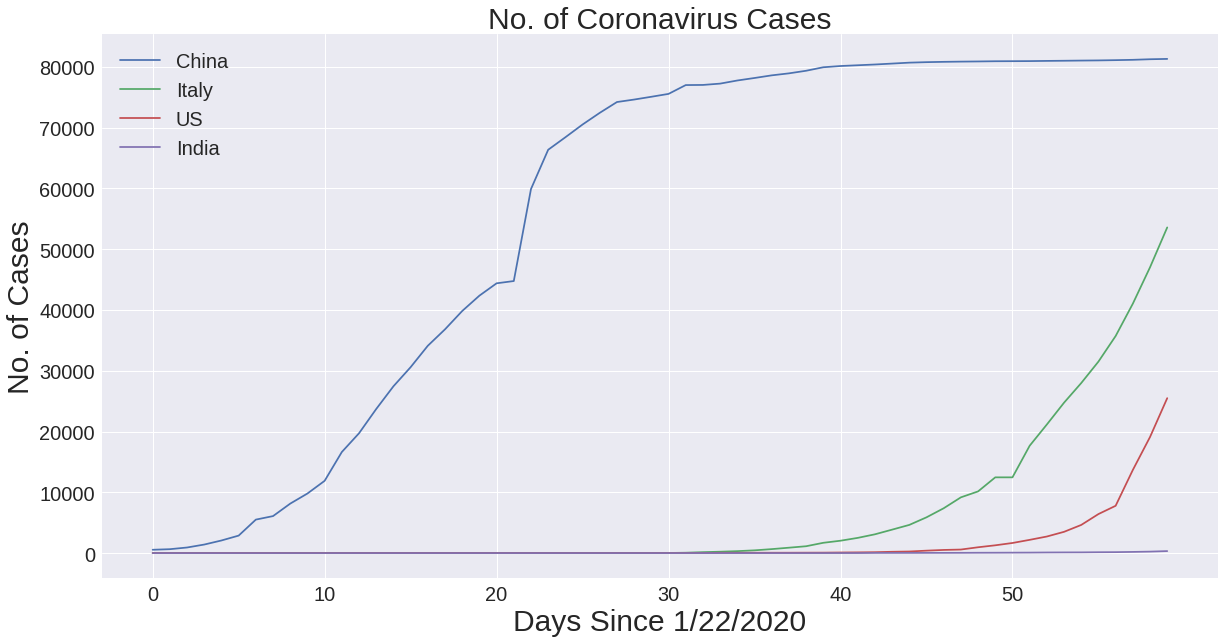

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(adjusted_dates_20, china_cases)
plt.plot(adjusted_dates_20, italy_cases)
plt.plot(adjusted_dates_20, us_cases)
plt.plot(adjusted_dates_20, india_cases )
plt.title('No. of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.legend(['China', 'Italy', 'US','India'], prop={'size': 20})
plt.xticks(np.arange(0, 60, 10), size=20)
plt.yticks(size=20)
plt.show()

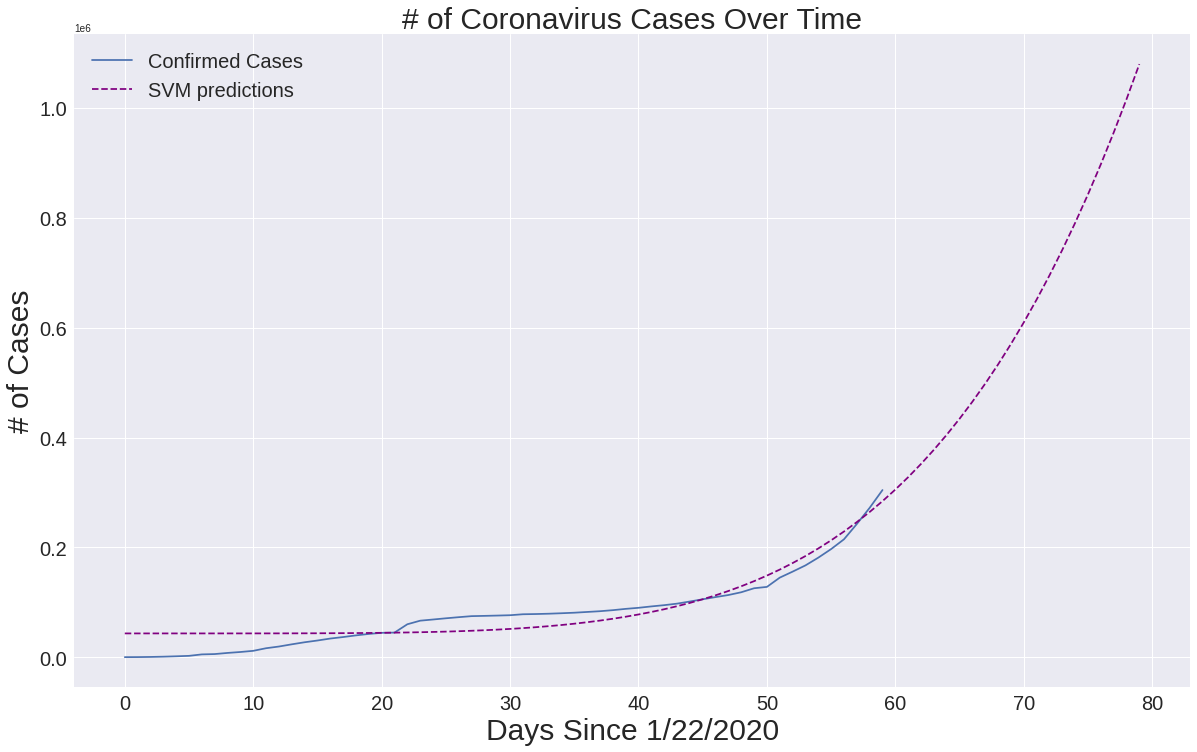

In [ ]:
# SVM model prediction with original data

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

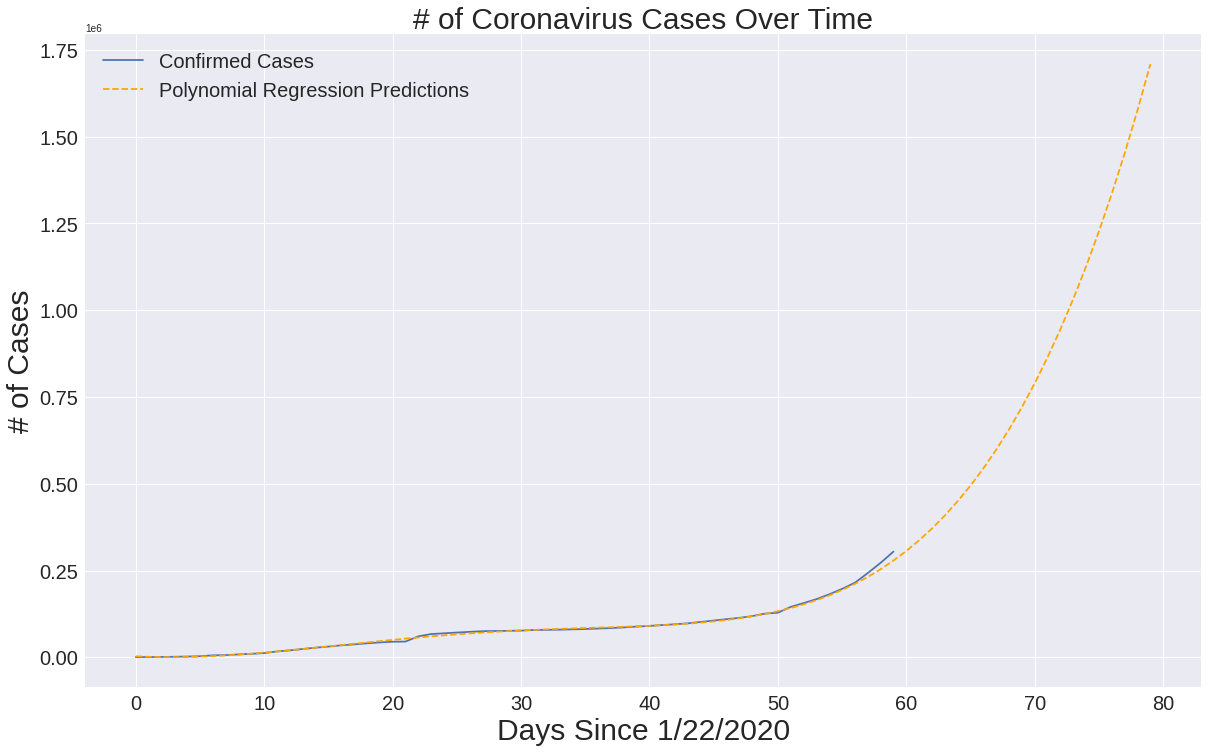

In [ ]:
# Polynomial plotting predictions with original data

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

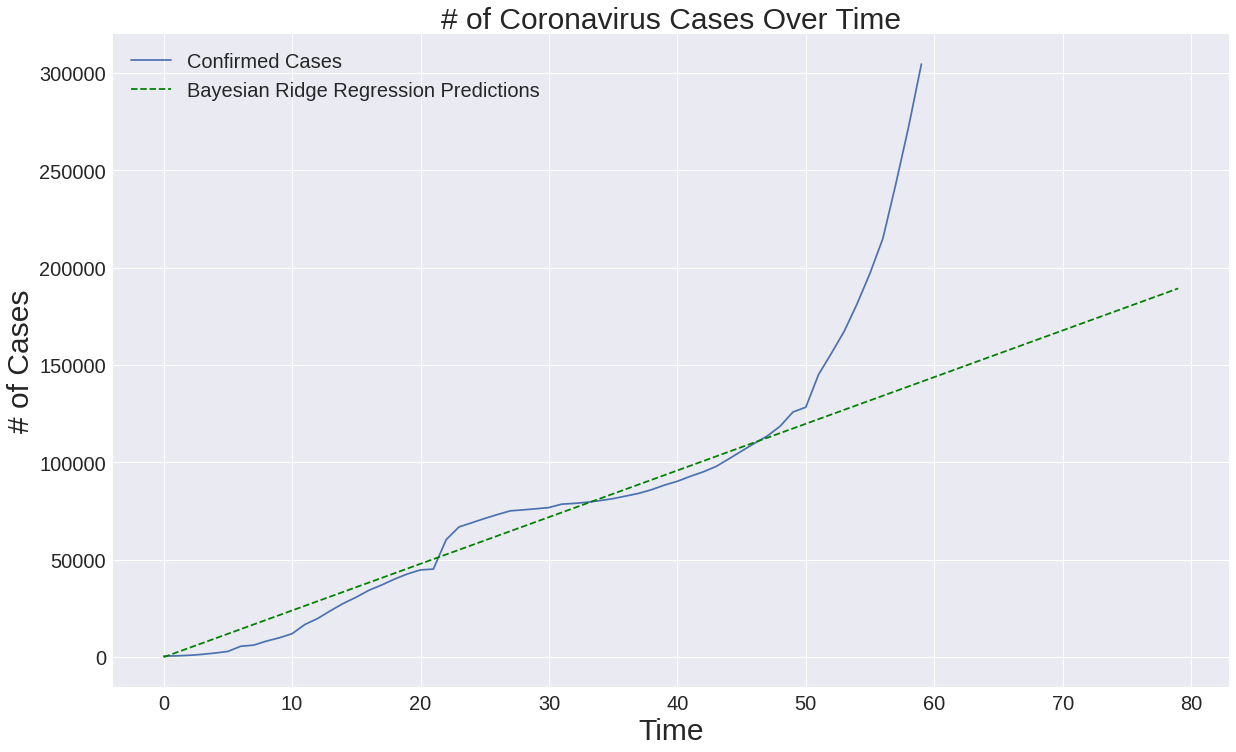

In [ ]:
# Bayesian Ridge prediction with original data

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, world_cases)
plt.plot(future_forecast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# Future predictions using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-16:], np.round(svm_pred[-16:])))

SVM future predictions:


{('03/26/2020', 405051.0),
 ('03/27/2020', 434176.0),
 ('03/28/2020', 465149.0),
 ('03/29/2020', 498057.0),
 ('03/30/2020', 532990.0),
 ('03/31/2020', 570039.0),
 ('04/01/2020', 609300.0),
 ('04/02/2020', 650869.0),
 ('04/03/2020', 694847.0),
 ('04/04/2020', 741337.0),
 ('04/05/2020', 790446.0),
 ('04/06/2020', 842282.0),
 ('04/07/2020', 896958.0),
 ('04/08/2020', 954589.0),
 ('04/09/2020', 1015292.0),
 ('04/10/2020', 1079190.0)}

In [ ]:
# Future predictions using Polynomial Regression

linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forecast_dates[-16:], np.round(linear_pred[-16:])))

Polynomial regression future predictions:


{('03/26/2020', 449793.0),
 ('03/27/2020', 494955.0),
 ('03/28/2020', 544353.0),
 ('03/29/2020', 598258.0),
 ('03/30/2020', 656952.0),
 ('03/31/2020', 720724.0),
 ('04/01/2020', 789877.0),
 ('04/02/2020', 864720.0),
 ('04/03/2020', 945575.0),
 ('04/04/2020', 1032776.0),
 ('04/05/2020', 1126664.0),
 ('04/06/2020', 1227593.0),
 ('04/07/2020', 1335928.0),
 ('04/08/2020', 1452044.0),
 ('04/09/2020', 1576329.0),
 ('04/10/2020', 1709182.0)}

In [ ]:
# Future predictions using Linear (Ridge) Regression

print('Linear(Ridge) regression future predictions:')
set(zip(future_forecast_dates[-16:], np.round(bayesian_pred[-16:])))

Linear(Ridge) regression future predictions:


{('03/26/2020', 153395.0),
 ('03/27/2020', 155792.0),
 ('03/28/2020', 158189.0),
 ('03/29/2020', 160586.0),
 ('03/30/2020', 162982.0),
 ('03/31/2020', 165379.0),
 ('04/01/2020', 167776.0),
 ('04/02/2020', 170173.0),
 ('04/03/2020', 172570.0),
 ('04/04/2020', 174967.0),
 ('04/05/2020', 177363.0),
 ('04/06/2020', 179760.0),
 ('04/07/2020', 182157.0),
 ('04/08/2020', 184554.0),
 ('04/09/2020', 186951.0),
 ('04/10/2020', 189347.0)}

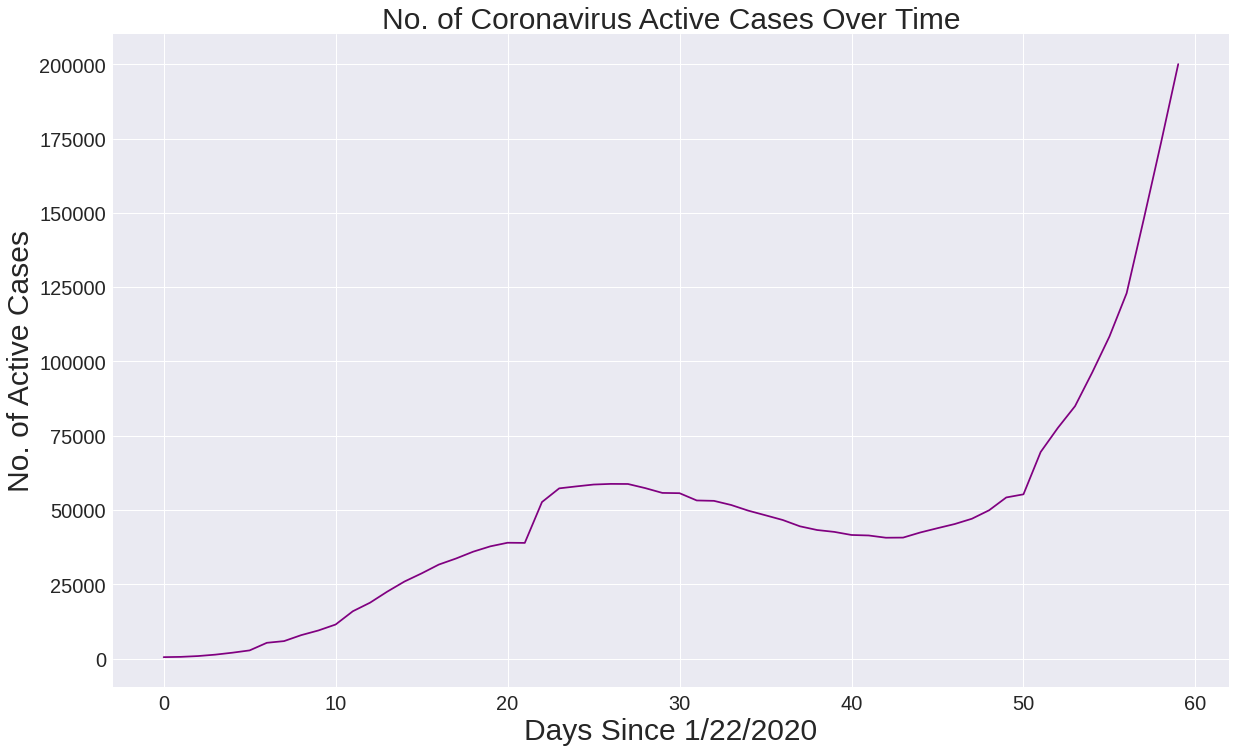

In [ ]:
# plotting over total active cases

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, total_active, color='purple')
plt.title('No. of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

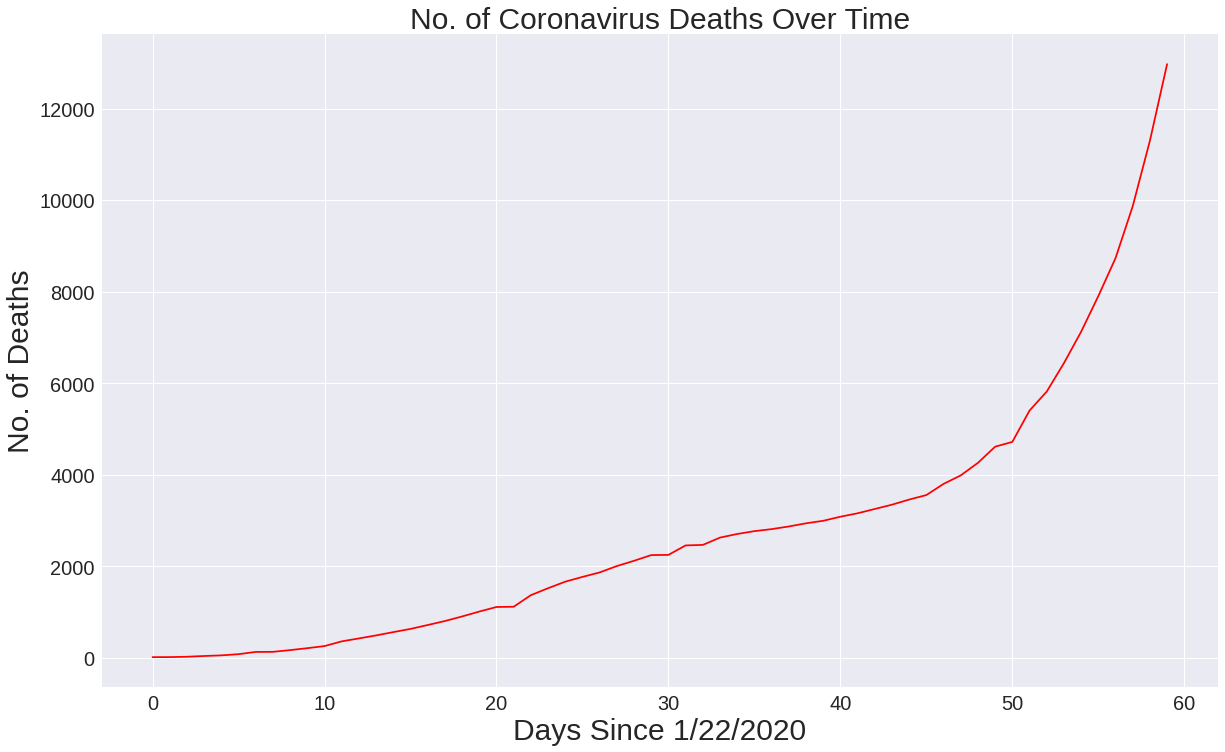

In [ ]:
# plotting Deaths due to COVID-19

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, total_deaths, color='red')
plt.title('No. of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

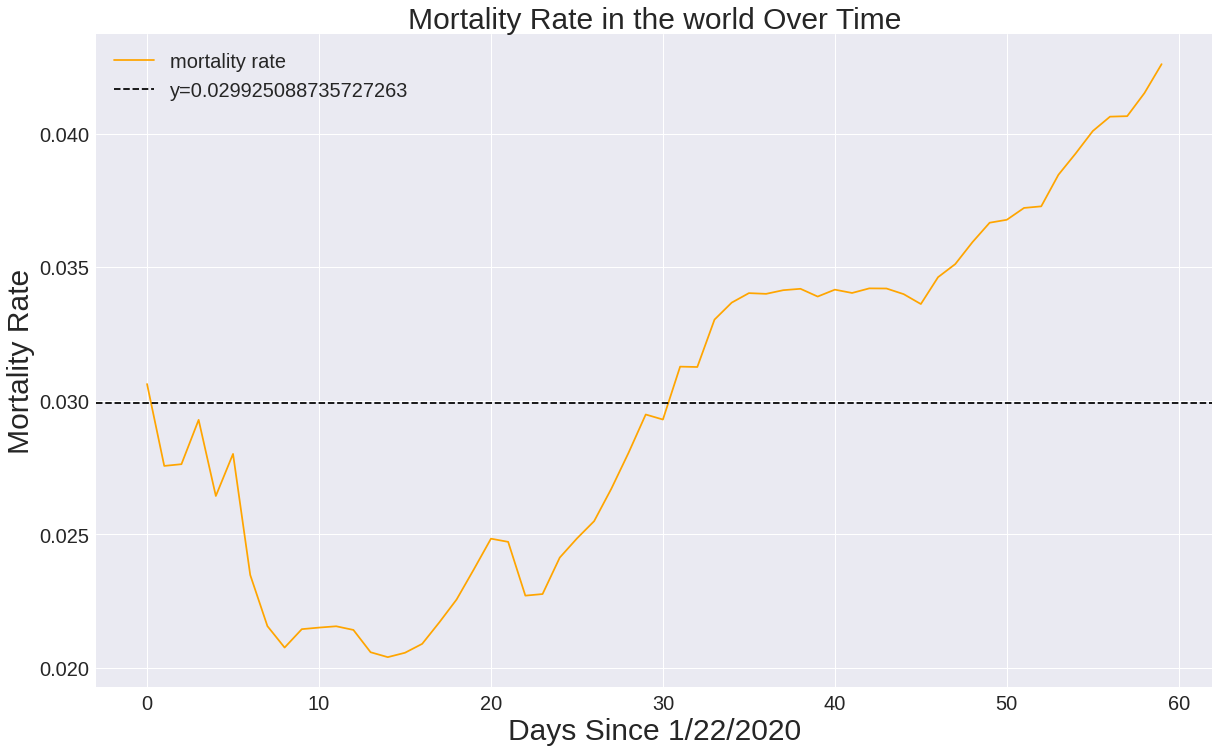

In [ ]:
# mean mortality rate in the world in COVID-19

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate in the world Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


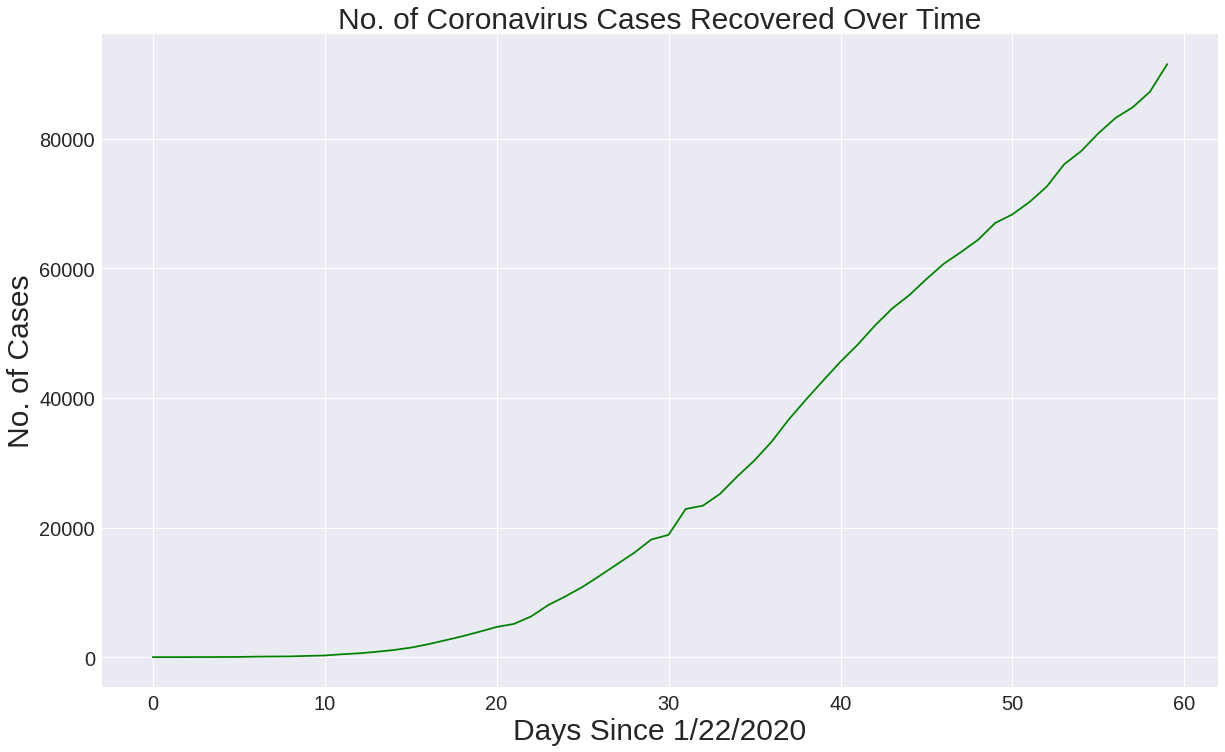

In [ ]:
# Recovery rate of COVID-19 affected world

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, total_recovered, color='green')
plt.title('No. of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

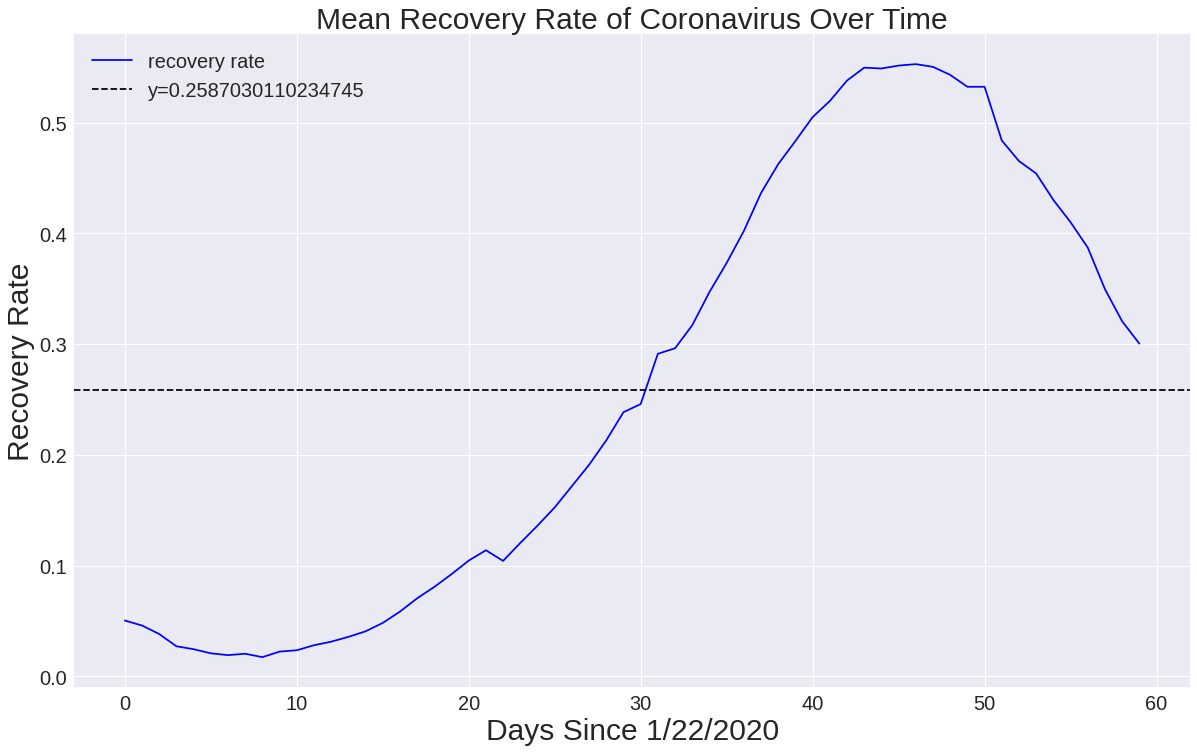

In [ ]:
# Mean Recovery Rate of COVID-19 affected world.

mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Mean Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

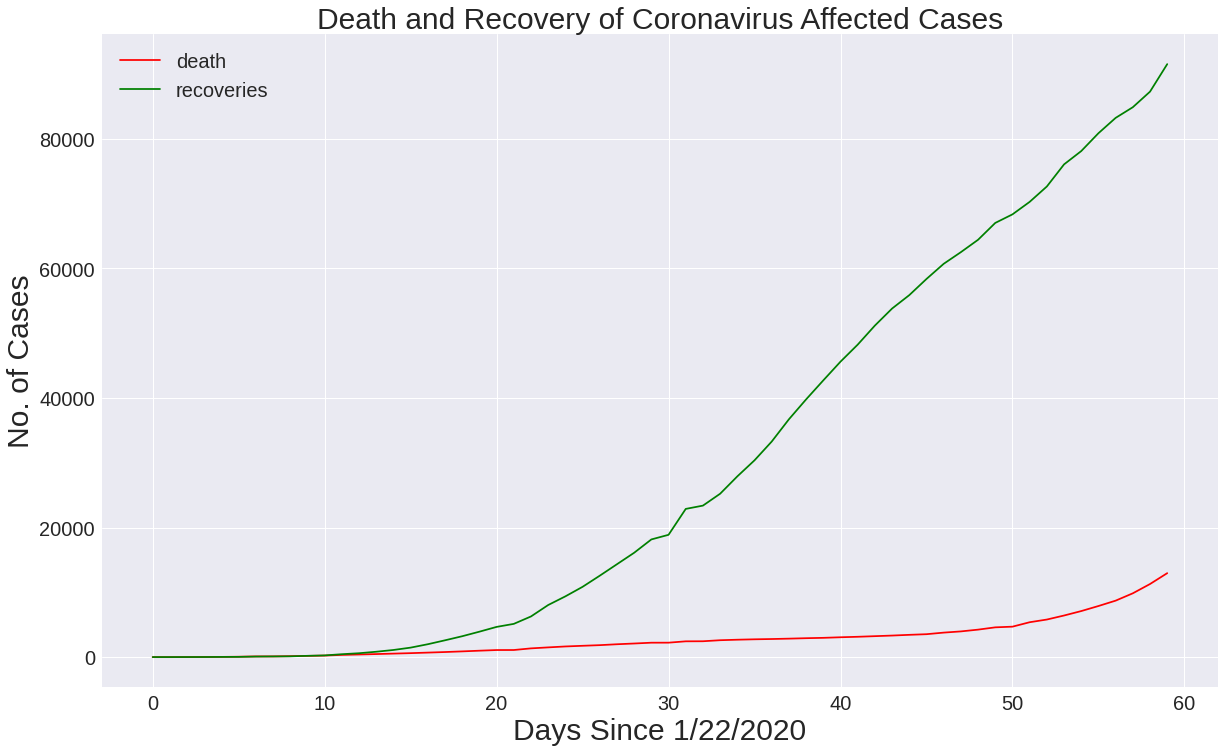

In [ ]:
# Death and Recovery in COVID-19 over TIME

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates_20, total_deaths, color='r')
plt.plot(adjusted_dates_20, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Death and Recovery of Coronavirus Affected Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No. of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


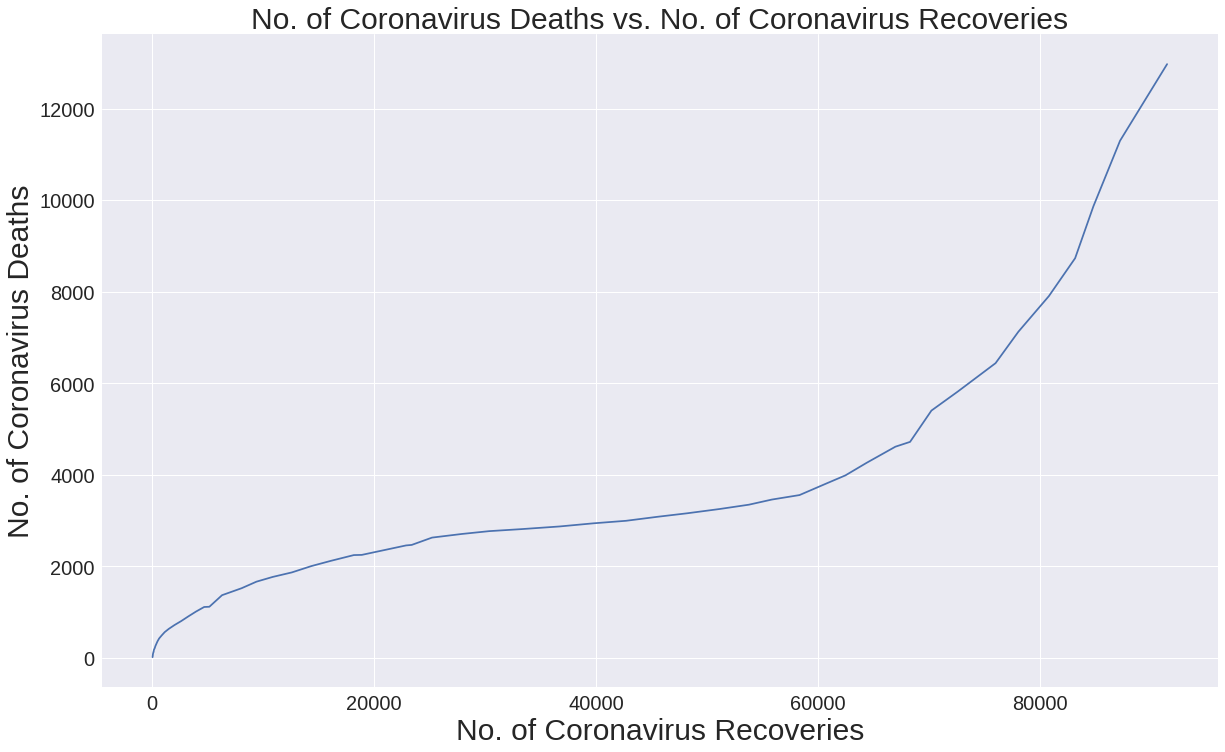

In [ ]:
# Plotting No.of Deaths against No.of Recoveries

plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('No. of Coronavirus Deaths vs. No. of Coronavirus Recoveries', size=30)
plt.xlabel('No. of Coronavirus Recoveries', size=30)
plt.ylabel('No. of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()